In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
#Loading the Dataset & Displaying Initial 5 Rows
tl = pd.read_csv('./Telecom_Churn_data.csv')
tl.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#Displaying the last 5 Rows
tl.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
#Displaying the number of Rows & Columns
tl.shape

(2666, 20)

In [7]:
#Showing all the columns
tl.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [8]:
#check for missing value
print(tl.isnull().sum())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


In [9]:
#Overview of the Data types
tl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [10]:
#Statistics of the loaded Data
tl.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
#No.of.customer Not Churning vs Churning
churn_counts = tl['Churn'].value_counts()

<ipython-input-12-7377152477dd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=tl, palette='Set2')


Text(0, 0.5, 'Count')

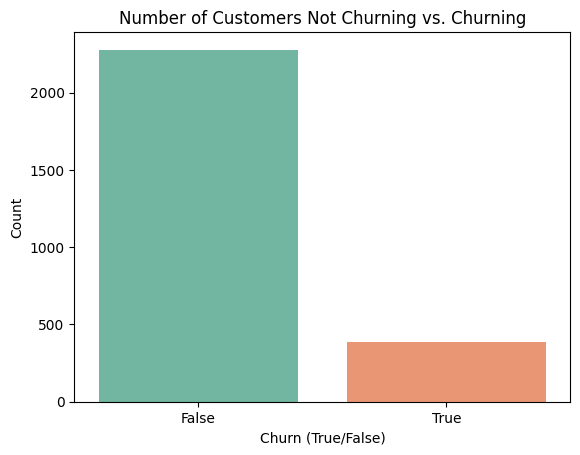

In [12]:
#Visualize the churnt count
sns.countplot(x='Churn', data=tl, palette='Set2')
plt.title('Number of Customers Not Churning vs. Churning')
plt.xlabel('Churn (True/False)')
plt.ylabel('Count')

In [13]:
#Percentage of Customers that are leaving
num_retained = tl[tl.Churn == False].shape[0]
num_churned = tl[tl.Churn == True].shape[0]

# Percentage of Customers that Stayed
print(num_retained / (num_retained + num_churned) * 100, '% of Customers stayed with the company')

# Percentage of Customers that Left
print(num_churned / (num_retained + num_churned) * 100, '% of Customers left the company')


85.4463615903976 % of Customers stayed with the company
14.553638409602401 % of Customers left the company


<Axes: xlabel='Area code', ylabel='count'>

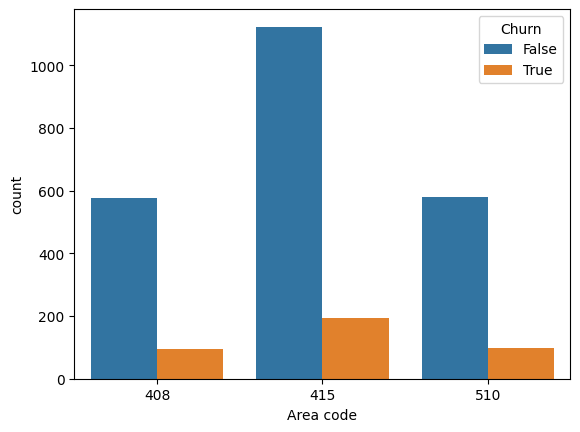

In [14]:
#Visualize the churn count by area code
sns.countplot (x='Area code', hue = 'Churn', data=tl)

<Axes: xlabel='International plan', ylabel='count'>

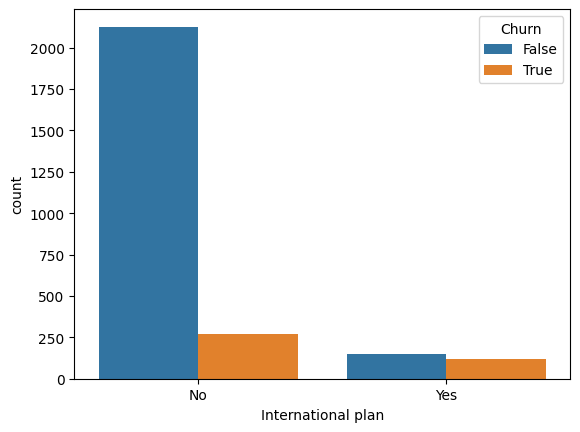

In [15]:
#Visualize the churn count by International Plan
sns.countplot (x='International plan', hue = 'Churn', data=tl)

([<matplotlib.axis.XTick at 0x7de071e5e260>,
 [Text(0, 0, '1'),
  Text(35, 0, '38'),
  Text(70, 0, '73'),
  Text(105, 0, '108'),
  Text(140, 0, '143'),
  Text(175, 0, '179'),
  Text(210, 0, '')])

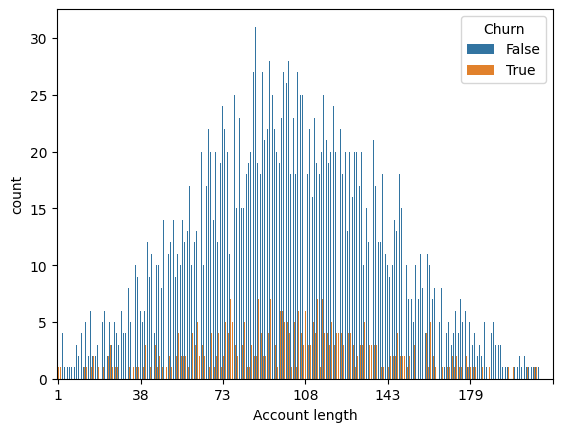

In [16]:
#Visualize the churn count by Account length
sns.countplot (x='Account length', hue = 'Churn', data=tl)

# Set x-axis intervals to 35
plt.xticks(np.arange(0, 243, 35))



<Axes: xlabel='Customer service calls', ylabel='count'>

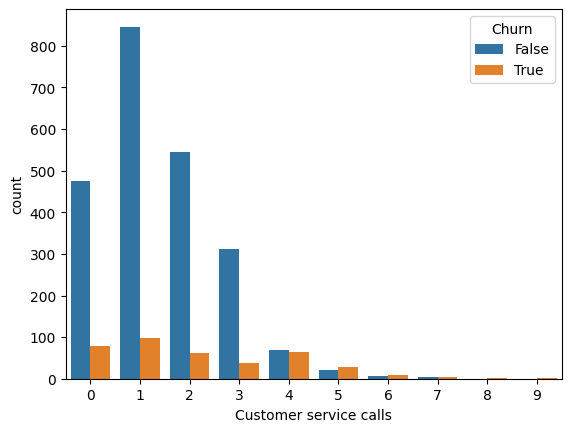

In [17]:
#Visualize the churn count by Customer service calls
sns.countplot (x='Customer service calls', hue = 'Churn', data=tl)

<Axes: xlabel='Voice mail plan', ylabel='count'>

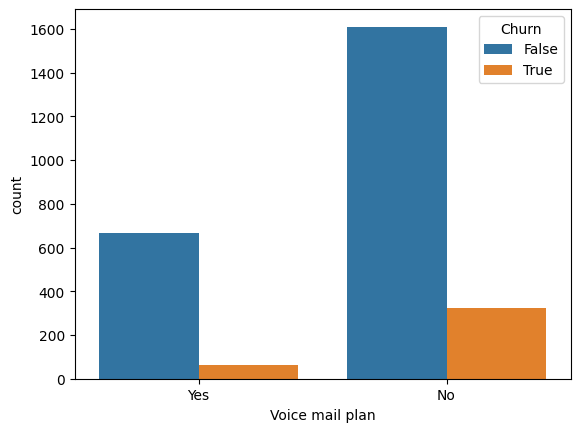

In [18]:
#Visualize the churn count by Voice mail plan
sns.countplot (x='Voice mail plan', hue = 'Churn', data=tl)

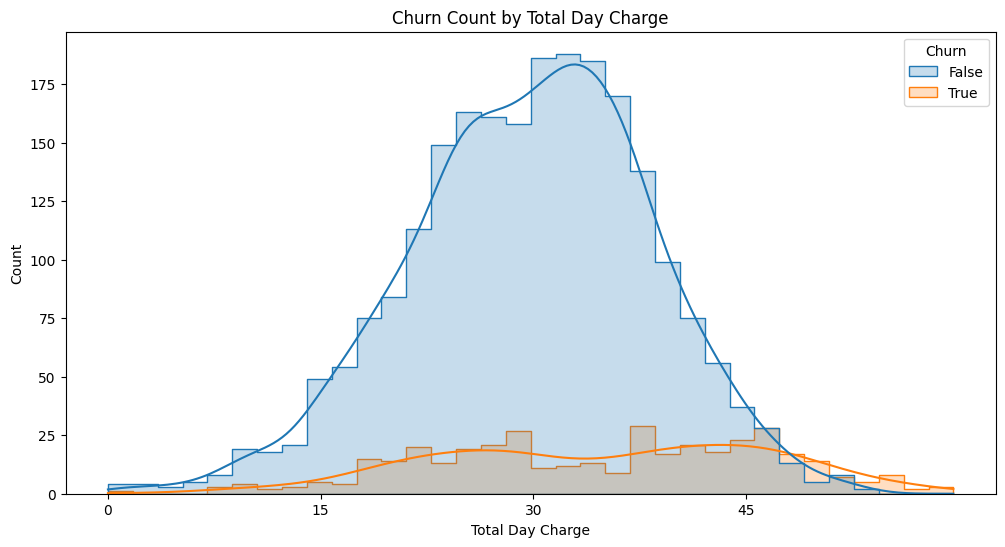

In [19]:
# Visualize the churn count by Total day charge using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=tl, x='Total day charge', hue='Churn', element='step', kde=True)

# Set x-axis intervals to 15
plt.xticks(np.arange(0, 60, 15))

plt.xlabel('Total Day Charge')
plt.ylabel('Count')
plt.title('Churn Count by Total Day Charge')
plt.show()

In [20]:
#Remove unnecessery columns
cleaned_tl = tl.drop(['State', 'Area code'], axis=1)

In [21]:
#Revised rows and columns in the data set
cleaned_tl.shape

(2666, 18)

In [22]:
#Convert non-numeric data into numeric data
for column in cleaned_tl.columns:
    if pd.api.types.is_numeric_dtype(cleaned_tl[column]):
        continue
    cleaned_tl[column] = LabelEncoder().fit_transform(cleaned_tl[column])


In [23]:
#Showing the data types of new data set
cleaned_tl.dtypes

,0
Account length,int64
International plan,int64
Voice mail plan,int64
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64
Total eve calls,int64
Total eve charge,float64


In [24]:
#Displaying the first 5 data values of the new dataset
cleaned_tl.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [25]:
# Separating features and target variable
X = cleaned_tl.drop('Churn', axis=1)  # Feature dataset (ensure 'Churn' matches your column name)
y = cleaned_tl['Churn']

# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# Split the data into 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [27]:
#Create the Model
model = LogisticRegression()
#Train the model
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
#Create the predictions on the test data
predictions = model.predict(x_test)

#Print the predictions
print(predictions)

[False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False  True  True False False False False False
 False False  True False False  True False False False False False False
 False False False False False  True False False Fa

In [29]:
#Check precision, recall and f1 score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.88      0.97      0.92       456
        True       0.52      0.19      0.28        78

    accuracy                           0.86       534
   macro avg       0.70      0.58      0.60       534
weighted avg       0.82      0.86      0.83       534

